### Plot Prediction Result to ROC Curve

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../../')

In [13]:
import os
import matplotlib.pyplot as plt
import math
import numpy as np
from PIL import Image
from glob import glob
import pandas as pd
from tqdm import tqdm

from sklearn.metrics import accuracy_score, auc, roc_curve


#### Post Process Prediction Mask

In [5]:
SAMPLE_PRED_DATA_DIR = '/Users/seung-jae_bang/Personal/Columbia/Applied_DL/Camelyon_Project/data/sample_data/'

inference_file_name = 'zoom_1_256_256_slide_031_sample_pred.csv'

In [6]:
inference_df = pd.read_csv(os.path.join(SAMPLE_PRED_DATA_DIR, inference_file_name))

In [7]:
inference_df.head()

,file_name,img_id,include,label,non_gray_ratio,type,is_roi,y_pred_prob
0,tumor_slide_031_split_197_115.png,31,1,0,0.548355,val,1,0.044086
1,tumor_slide_031_split_342_109.png,31,1,1,0.642578,val,1,0.463172
2,tumor_slide_031_split_297_128.png,31,1,0,0.907181,val,1,0.029121
3,tumor_slide_031_split_324_108.png,31,1,1,0.717300,val,1,0.771664
4,tumor_slide_031_split_297_92.png,31,1,1,0.618423,val,1,0.737865


In [10]:
inference_df.dtypes

file_name          object
img_id              int64
include             int64
label               int64
non_gray_ratio    float64
type               object
is_roi              int64
y_pred_prob       float64
dtype: object

In [11]:
y_test = inference_df['label'].values
y_test_pred_prob = inference_df['y_pred_prob'].values

In [14]:
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)

In [16]:
roc_auc = auc(fpr, tpr)

In [17]:
roc_auc

0.9368208194126956

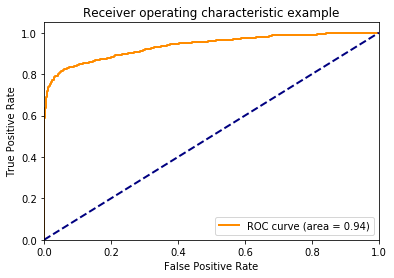

In [20]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()